In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import math
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from metrics.RankEval import RankEval
from utils.EvalsBase import EvaluatorBasics
import numpy as np

In [64]:
diff_n_categories = [i * 5 for i in range(1, 10)]
diff_n_samples = [i*2 for i in range(2, 18)]

# Kendall's Tau

In [3]:
evaluator = RankEval()

In [66]:
plt.ioff()

In [39]:
a = 19
n = 1000

In [40]:
categories = [f'cat{i+1}' for i in range(a)]
rand_rankings = [{cat: i+1 for i, cat in enumerate(random.sample(categories, a))} for i in range(n)]
rand_pairs = evaluator.create_unique_pairs(rand_rankings)

In [41]:
tau_dist = [evaluator._kendalls_tau(r1, r2) for r1, r2 in rand_pairs]
tau_dist = np.array(tau_dist)

In [42]:
min(tau_dist)

0.14035087719298245

<Axes: ylabel='Density'>

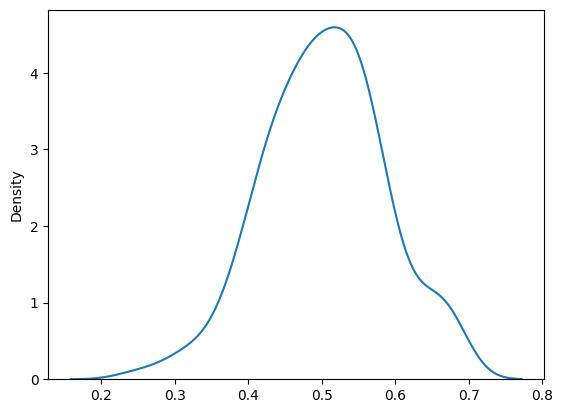

In [18]:
sns.kdeplot(tau_dist)

In [67]:
with PdfPages('Kendall_Tau_Distributions2.pdf') as pdf:
    for n_cat in diff_n_categories:
        for n in diff_n_samples:
            categories = [f'cat{i+1}' for i in range(n_cat)]
            rand_rankings = [{cat: i+1 for i, cat in enumerate(random.sample(categories, n_cat))} for i in range(n)]
            tau_dist = evaluator._for_analysis(rand_rankings)
            true, one_minus = tau_dist
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            sns.kdeplot(true, fill=True, ax=axes[0])
            axes[0].set_title(f'Distribution of Kendall\'s Tau for\n{n_cat} categories and {n} samples')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Density')

            sns.kdeplot(one_minus, fill=True, ax=axes[1])
            axes[1].set_title(f'Distribution of 1- Kendall\'s Tau for\n{n_cat} categories and {n} samples')
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')

            pdf.savefig()

print('done')



done


# Spearman's Rank Coefficient

In [68]:
evaluator = RankEval(method='spearman')

In [69]:
with PdfPages('Spearman_Coef_Distributions.pdf') as pdf:
    for n_cat in diff_n_categories:
        for n in diff_n_samples:
            categories = [f'cat{i+1}' for i in range(n_cat)]
            rand_rankings = [{cat: i+1 for i, cat in enumerate(random.sample(categories, n_cat))} for i in range(n)]
            spearman_dist = evaluator._for_analysis(rand_rankings)
            true, one_minus = spearman_dist
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            sns.kdeplot(true, fill=True, ax=axes[0])
            axes[0].set_title(f'Distribution of Spearman\'s Coefficient for\n{n_cat} categories and {n} samples')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Density')

            sns.kdeplot(one_minus, fill=True, ax=axes[1])
            axes[1].set_title(f'Distribution of 1- Spearman\'s Coefficient for\n{n_cat} categories and {n} samples')
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')

            pdf.savefig()

print('done')

done


# Hamming Distance

In [70]:
evaluator = RankEval(method='hamming')

In [71]:
with PdfPages('Hamming_Dist_Distributions.pdf') as pdf:
    for n_cat in diff_n_categories:
        for n in diff_n_samples:
            plt.figure(figsize=(6, 4))
            categories = [f'cat{i+1}' for i in range(n_cat)]
            rand_rankings = [{cat: i+1 for i, cat in enumerate(random.sample(categories, n_cat))} for i in range(n)]
            hamming_dist = evaluator._for_analysis(rand_rankings)
            true, _ = hamming_dist
            # fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            sns.kdeplot(true, fill=True)
            plt.title(f'Distribution of Normalized Hamming Distance for\n{n_cat} categories and {n} samples')
            plt.xlabel('Value')
            plt.ylabel('Density')

            pdf.savefig()

print('done')

done
